# Dataset analyse

In [2]:
import pandas as pd

import dataset
import matplotlib.pyplot as plt

retail_dataset = dataset.Dataset("retail.csv")
print(retail_dataset.df.count())
retail_dataset.handle_missing_or_wrong_values()
print()
print(retail_dataset.df.count())



Invoice        1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Invoice        713915
StockCode      713915
Description    713915
Quantity       713915
InvoiceDate    713915
Price          713915
Customer ID    713915
Country        713915
dtype: int64


## Performance difference loops and pandas implementation

In [8]:
from datetime import datetime

retail_dataset = dataset.Dataset("retail.csv")
start_time = datetime.now()

df1 = retail_dataset.df[retail_dataset.df["Description"] != ""]

end_time_1 = datetime.now()

for index, row in retail_dataset.df.iterrows():
    if row["Description"] != "":
        retail_dataset.df.drop(index=index, inplace=True)

end_time_2 = datetime.now()

print(f"time taken pandas {start_time - end_time_1} | time taken loop {end_time_2 - end_time_1}")

KeyboardInterrupt: 

# Data categorization
To know how to categorize the data we will first plot the values to get an idea of how our data is distributed

## Price distribution

In [1]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()

print("max", retail_dataset.df['Price'].max())
print("min", retail_dataset.df['Price'].min())
print("mean", retail_dataset.df['Price'].mean())
print("median", retail_dataset.df['Price'].median())

fig, axes = plt.subplots(2, 3)

limited_information =  retail_dataset.df
limited_information['Price'].plot(kind='hist', title='All prices', ax=axes[0,0])

limited_information =  limited_information[limited_information["Price"] <= 5]
limited_information['Price'].plot(kind='hist', title='Prices <= 5', ax=axes[0,1])
print("items Prices <= 5:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 5]
limited_information =  limited_information[limited_information["Price"] <= 20]
limited_information['Price'].plot(kind='hist', title='5 < Prices <= 20', ax=axes[0,2])
print("items 5 < Prices <= 20:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 20]
limited_information =  limited_information[limited_information["Price"] <= 100]
limited_information['Price'].plot(kind='hist', title='20 < Prices <= 100', ax=axes[1,0])
print("items 20 < Prices <= 100:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 100]
limited_information['Price'].plot(kind='hist', title='100 < Prices', ax=axes[1,1])
print("items 100 <= Prices:", limited_information['Price'].count())

NameError: name 'dataset' is not defined

## Quantity distribution

max 74215
min 1
mean 13.295253636637415
median 6.0
Quantity == 1	 133428
1 < Quantity <= 5	 223187
5 < Quantity <= 20	 261117
20 < Quantity <= 100	 87329
100 < Quantity <= 1000	 8586
1000 < Quantity	 268


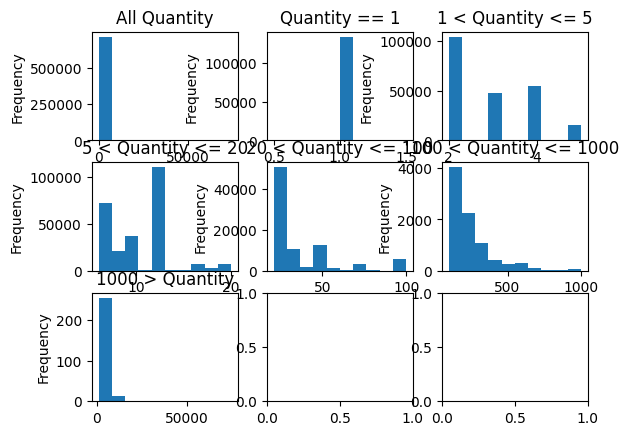

In [5]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()

print("max", retail_dataset.df['Quantity'].max())
print("min", retail_dataset.df['Quantity'].min())
print("mean", retail_dataset.df['Quantity'].mean())
print("median", retail_dataset.df['Quantity'].median())

fig, axes = plt.subplots(3, 3)

limited_information =  retail_dataset.df
limited_information['Quantity'].plot(kind='hist', title='All Quantity', ax=axes[0,0])

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] == 1]
limited_information['Quantity'].plot(kind='hist', title='Quantity == 1', ax=axes[0,1])
print("Quantity == 1\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] <= 5]
limited_information =  limited_information[limited_information["Quantity"] > 1]
limited_information['Quantity'].plot(kind='hist', title='1 < Quantity <= 5', ax=axes[0,2])
print("1 < Quantity <= 5\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 5]
limited_information =  limited_information[limited_information["Quantity"] <= 20]
limited_information['Quantity'].plot(kind='hist', title='5 < Quantity <= 20', ax=axes[1,0])
print("5 < Quantity <= 20\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 20]
limited_information =  limited_information[limited_information["Quantity"] <= 100]
limited_information['Quantity'].plot(kind='hist', title='20 < Quantity <= 100', ax=axes[1,1])
print("20 < Quantity <= 100\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 100]
limited_information =  limited_information[limited_information["Quantity"] <= 1000]
limited_information['Quantity'].plot(kind='hist', title='100 < Quantity <= 1000', ax=axes[1,2])
print("100 < Quantity <= 1000\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 1000]
limited_information['Quantity'].plot(kind='hist', title='1000 > Quantity', ax=axes[2,0])
print("1000 < Quantity\t", limited_information['Quantity'].count())

## Time categorization

max 2011-12-09 12:50:00
min 2009-12-01 07:45:00
mean 2011-01-02 21:13:55.394028544
median 2010-12-07 15:28:00
InvoiceDateCat
time:12:00-15:59 [week_day]       489248
time:06:00-11:59 [week_day]       268061
time:16:00-18:59 [week_day]       159109
time:12:00-15:59 [weekend_day]     97728
time:06:00-11:59 [weekend_day]     32444
time:19:00-24:00 [week_day]        11295
time:16:00-18:59 [weekend_day]      9486
Name: count, dtype: int64


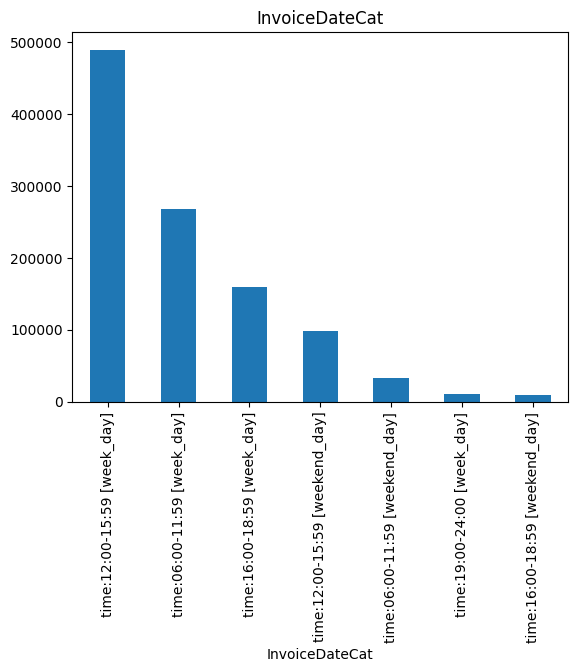

In [2]:
retail_dataset = dataset.Dataset("retail.csv")
#retail_dataset.handle_missing_or_wrong_values()
retail_dataset.categorize_data()

print("max", retail_dataset.df['InvoiceDate'].max())
print("min", retail_dataset.df['InvoiceDate'].min())
print("mean", retail_dataset.df['InvoiceDate'].mean())
print("median", retail_dataset.df['InvoiceDate'].median())

#fig, axes = plt.subplots(2, 3)

limited_information =  retail_dataset.df
limited_information['InvoiceDateCat'].value_counts().plot(kind='bar', title='InvoiceDateCat')

print(limited_information['InvoiceDateCat'].value_counts())
